# Introduction to Tensors in Φ<sub>Flow</sub>

[▶️ Introduction Video](https://youtu.be/4nYwL8ZZDK8)

Like NumPy, TensorFlow, PyTorch and Jax, Φ<sub>Flow</sub> provides a [`Tensor` class](https://tum-pbs.github.io/PhiFlow/phi/math/#phi.math.Tensor).
There are, however, two crucial differences:

1. Φ<sub>Flow</sub> tensors are backed by tensors of one of the other libraries, referred to as *native* tensors. All Φ<sub>Flow</sub> functions get translated into basic native operations.
2. Dimensions of Φ<sub>Flow</sub> tensors have names and types. They are always referred to by name, not by their index. Reshaping takes place under-the-hood. The component can also be named.

In [2]:
from phi.flow import *
# from phi.torch.flow import *
# from phi.tf.flow import *
# from phi.jax.flow import *

Every dimension is assigned one of four types: [`channel`](https://tum-pbs.github.io/PhiFlow/phi/math/#phi.math.channel), [`spatial`](https://tum-pbs.github.io/PhiFlow/phi/math/#phi.math.spatial), [`instance`](https://tum-pbs.github.io/PhiFlow/phi/math/#phi.math.instance) or [ `batch`](https://tum-pbs.github.io/PhiFlow/phi/math/#phi.math.batch) (abbreviated as *c,s,i,b*).

*Channel* dimensions enumerate properties of a single object, be it the velocity components of a particle or grid cell, or the RGB components of a pixel.

Let's create a vector using [`math.vec`](https://tum-pbs.github.io/PhiFlow/phi/math/#phi.math.vec). This creates a `Tensor` with a channel dimension called `vector`.

In [2]:
point = vec(x=1, y=0)
print(f"{point:full:shape}")

(vectorᶜ=x,y)
 1, 0


Here, `point` is a `Tensor` with one channel (*c*) dimension named `vector` that lists two components, `x` and `y`.
Without the above formatting options, the vector will be printed in a more concise format.

In [3]:
point

(x=1, y=0)

We can use the built-in visualization tools to [`plot`](https://tum-pbs.github.io/PhiFlow/phi/vis/#phi.vis.plot) our point.

<Figure size 864x360 with 1 Axes>

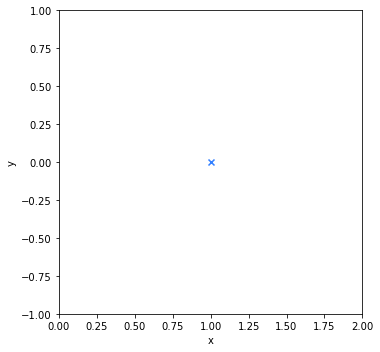

In [4]:
plot(point)

Alternatively, we can wrap an existing native tensor.
Then we have to specify the full shape.

In [5]:
wrap([1, 0], channel(vector='x,y'))

(x=1, y=0)

Next, let's create a collection of points at random locations.
We can use an instance dimension to list the points.

In [6]:
points = math.random_normal(instance(points=3), channel(vector='x,y'))
points

(x=-0.911, y=0.184); (x=0.358, y=-0.785); (x=0.593, y=0.269) (pointsⁱ=3, vectorᶜ=x,y)

<Figure size 864x360 with 1 Axes>

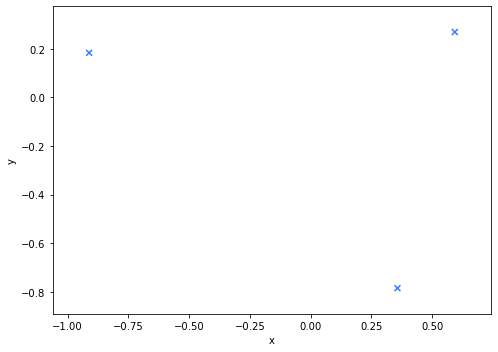

In [7]:
plot(points)

Φ<sub>Flow</sub> provides a concise syntax for accessing elements or slices of the tensor: `value.dimension[slice]`.
This syntax can also be used on all Φ<sub>Flow</sub> objects, not just tensors.

In [8]:
points.points[0]

(x=-0.911, y=0.184)

Since we have assigned item names to the `vector` dimension, we can access slices by name as well.

In [9]:
points.vector['x']

(-0.911, 0.358, 0.593) along pointsⁱ

There is an even shorter notation specifically for channel dimensions.

In [10]:
points['x']

(-0.911, 0.358, 0.593) along pointsⁱ

To slice multiple dimensions, repeat the above syntax or pass a dictionary.

In [11]:
points.points[0].vector['x']

-0.91106266

In [12]:
points[{'points': 0, 'vector': 'x'}]

-0.91106266

Spatial dimensions represent data sampled at regular intervals.
Tensors with spatial dimensions are interpreted as grids and the higher-level grid classes make use of them.
The grid resolution is equal to the

In [13]:
grid = math.random_uniform(spatial(x=10))
grid

(xˢ=10) 0.454 ± 0.245 (1e-01...9e-01)

<Figure size 864x360 with 1 Axes>

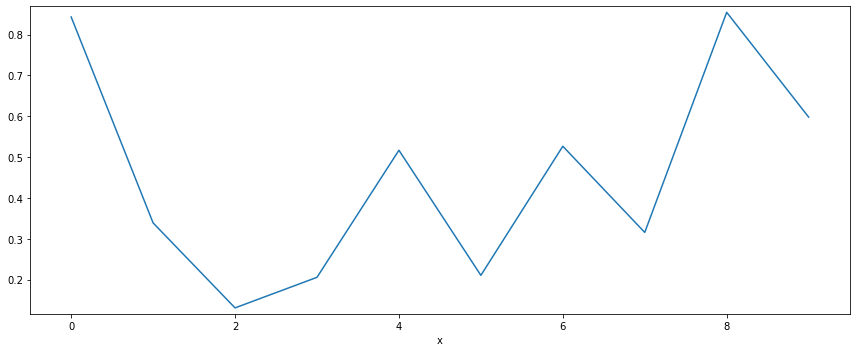

In [14]:
plot(grid)

The number of spatial dimensions equals the dimensionality of the physical space.

<Figure size 864x360 with 2 Axes>

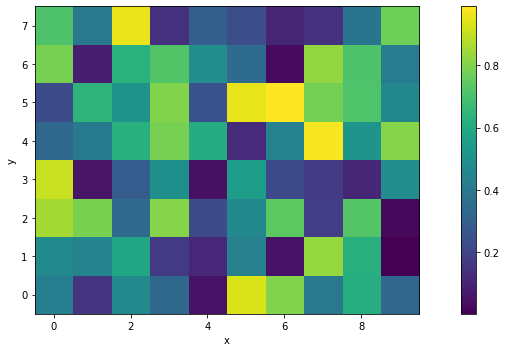

In [15]:
plot(math.random_uniform(spatial(x=10, y=8)))

Tensors need not have identical shapes to be operated on jointly.
Φ<sub>Flow</sub> automatically adds missing dimensions to tensors, i.e. tensors behave as if they were constant along every dimension that is not listed in their respective shapes.

<Figure size 864x360 with 2 Axes>

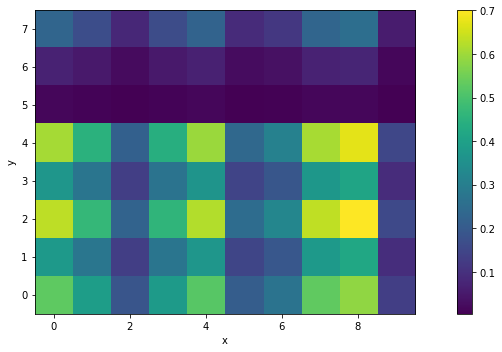

In [21]:
plot(math.random_uniform(spatial(x=10)) * math.random_uniform(spatial(y=8)))

Finally, *batch* dimensions are the primary method of running computations in parallel.
Slices along batch dimensions do not interact at all.
Batch dimensions replace functions like `vmap` that exist in other frameworks.

<Figure size 864x360 with 4 Axes>

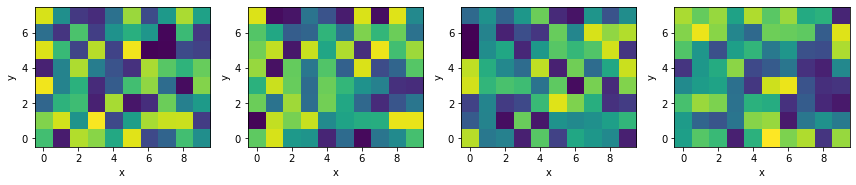

In [23]:
plot(math.random_uniform(batch(examples=4), spatial(x=10, y=8)), show_color_bar=False)

Tensors can be created from NumPy arrays as well as PyTorch, TensorFlow and Jax arrays.
The dimension types and names need to be specified.

In [6]:
t = tensor(np.zeros((4, 32, 32)), batch('b'), spatial('x,y'))
t

(bᵇ=4, xˢ=32, yˢ=32) float64 const 0.0

While `tensor()` automatically converts the data to the default backend (specified by the `phi.**.flow` import), `wrap()` keeps the data as-is or wraps it in a NumPy array.

In [4]:
wrap(np.zeros((4, 32, 32)), batch('b'), spatial('x,y'))

(bᵇ=4, xˢ=32, yˢ=32) float64 const 0.0

To retrieve the native version of a tensor, use `.native(order)`, passing in the desired dimension order.

In [9]:
t.native('b,y,x')

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

The NumPy representation can be retrieved the same way.

In [10]:
t.numpy('b,y,x')

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## Further Reading

* [`Φ.math` Overview](https://tum-pbs.github.io/PhiFlow/Math.html)
* [Optimization and Training](Optimization.md): Automatic differentiation, neural network training
* [Performance](GPU_Execution.md): GPU, JIT compilation, profiler